# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 649


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | oktyabrskiy
Processing Record 2 of Set 1 | bhind
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | la ronge
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | poum
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | catalina
Processing Record 10 of Set 1 | huarmey
Processing Record 11 of Set 1 | aswan
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | det udom
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | port-gentil
Processing Record 16 of Set 1 | dingle
Processing Record 17 of Set 1 | ambilobe
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | isilkul
Processing Record 20 of Set 1 | cherskiy
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | beloha
Processing Record 23 of Set 1 | mataura
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,oktyabrskiy,54.4815,53.4710,-18.47,100,94,1.64,RU,1675784562
1,bhind,26.5642,78.7883,17.24,43,0,3.37,IN,1675784565
2,atuona,-9.8000,-139.0333,25.89,72,8,7.79,PF,1675784151
3,la ronge,55.1001,-105.2842,-10.86,85,75,2.57,CA,1675784566
4,dikson,73.5069,80.5464,-28.71,95,77,6.36,RU,1675784566


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,oktyabrskiy,54.4815,53.4710,-18.47,100,94,1.64,RU,1675784562
1,bhind,26.5642,78.7883,17.24,43,0,3.37,IN,1675784565
2,atuona,-9.8000,-139.0333,25.89,72,8,7.79,PF,1675784151
3,la ronge,55.1001,-105.2842,-10.86,85,75,2.57,CA,1675784566
4,dikson,73.5069,80.5464,-28.71,95,77,6.36,RU,1675784566


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

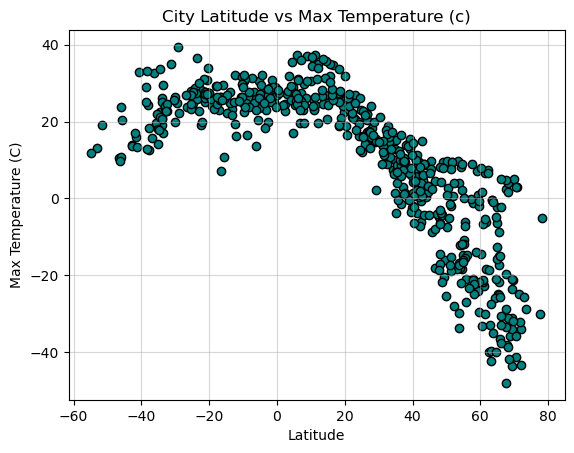

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color = "teal", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(alpha=.50)
plt.title("City Latitude vs Max Temperature (c)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

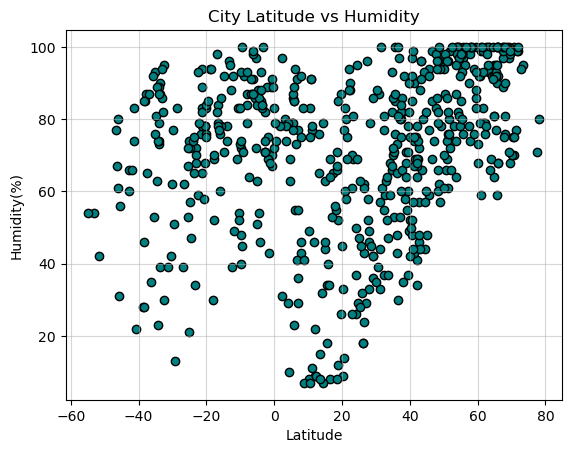

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color = "teal", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(alpha=.50)
plt.title("City Latitude vs Humidity")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

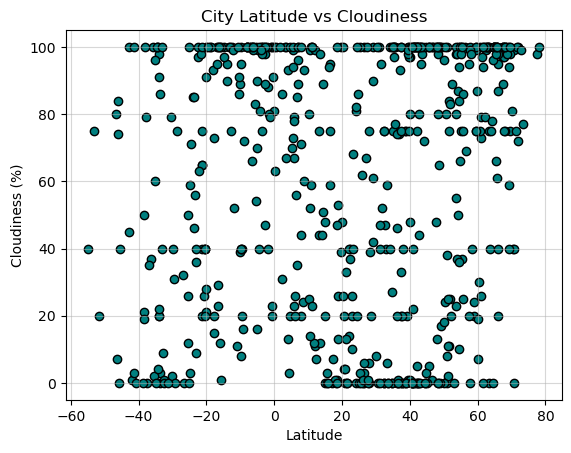

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'],  color = "teal", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(alpha=.50)
plt.title("City Latitude vs Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

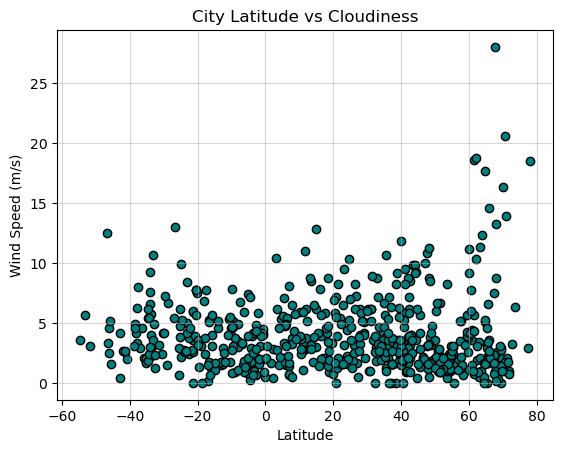

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'],  color = "teal", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(alpha=.50)
plt.title("City Latitude vs Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lin(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return (regress_values, line_eq, rvalue, pvalue)

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,oktyabrskiy,54.4815,53.4710,-18.47,100,94,1.64,RU,1675784562
1,bhind,26.5642,78.7883,17.24,43,0,3.37,IN,1675784565
3,la ronge,55.1001,-105.2842,-10.86,85,75,2.57,CA,1675784566
4,dikson,73.5069,80.5464,-28.71,95,77,6.36,RU,1675784566
8,catalina,32.5056,-110.9211,9.02,37,0,1.79,US,1675784274


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,atuona,-9.8000,-139.0333,25.89,72,8,7.79,PF,1675784151
5,poum,-20.2333,164.0167,26.96,83,100,3.61,NC,1675784567
6,hobart,-42.8794,147.3294,13.92,66,100,4.12,AU,1675783907
7,punta arenas,-53.1500,-70.9167,13.06,54,75,5.66,CL,1675784197
9,huarmey,-10.0681,-78.1522,24.82,73,39,3.98,PE,1675784569


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8668741069451056


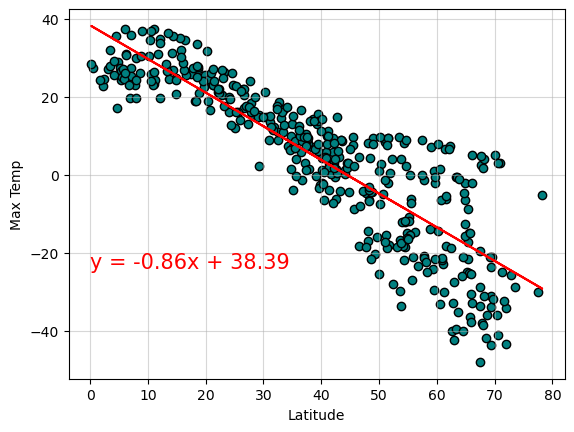

In [17]:
# Linear regression on Northern Hemisphere
lin_data = lin(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
print(f"The r-value is: {lin_data[2]}")
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], edgecolors = "black", color = "teal")
plt.plot(northern_hemi_df["Lat"], lin_data[0], "r-")
plt.annotate(lin_data[1], (0,-24), fontsize = 15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(alpha=.5)
plt.show()

The r-value is: 0.41634250946369933


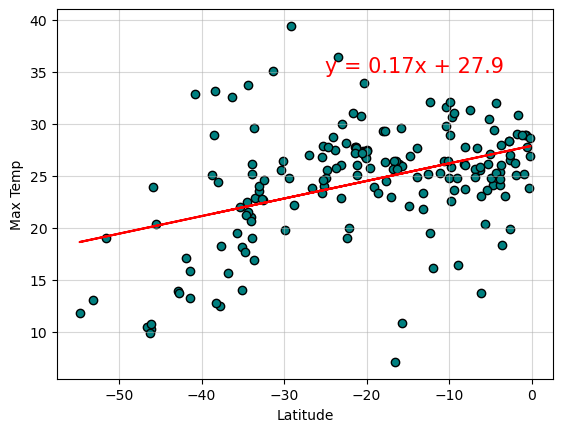

In [20]:
# Linear regression on Southern Hemisphere
lin_data = lin(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
print(f"The r-value is: {lin_data[2]}")
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], edgecolors = "black", color = "teal")
plt.plot(southern_hemi_df["Lat"],lin_data[0], "r-")
plt.annotate(lin_data[1], (-25,35), fontsize = 15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(alpha=.5)
plt.show()

**Discussion about the linear relationship:** 
In the northern hemisphere, as Latitude (x) increases, Max Temp (y) decreases, showing us a negative linear relationship. We obtain an r-value of -.086, indicating a moderate-strong relationship.
In the Southern Hemisphere, as Latitude (x) increases, Max Temp (y) increases, showing up a positive linear relationship. We obtain an r-value of .041, indicating a weak relationship.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.5269615521295407


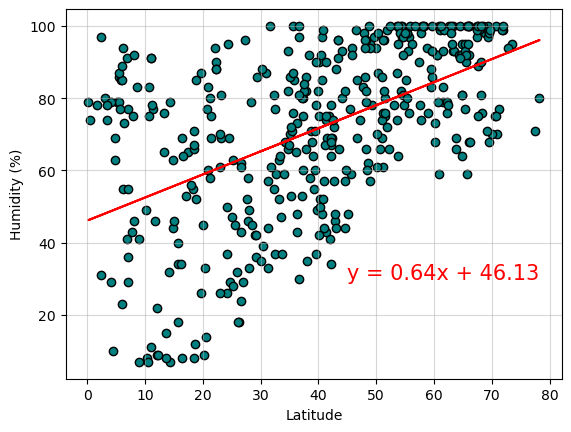

In [21]:
# Northern Hemisphere
lin_data = lin(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
print(f"The r-value is: {lin_data[2]}")
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], edgecolors = "black", color = "teal")
plt.plot(northern_hemi_df["Lat"],lin_data[0], "r-")
plt.annotate(lin_data[1], (45,30), fontsize = 15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(alpha=.5)
plt.show()

The r-value is: 0.3044108419829891


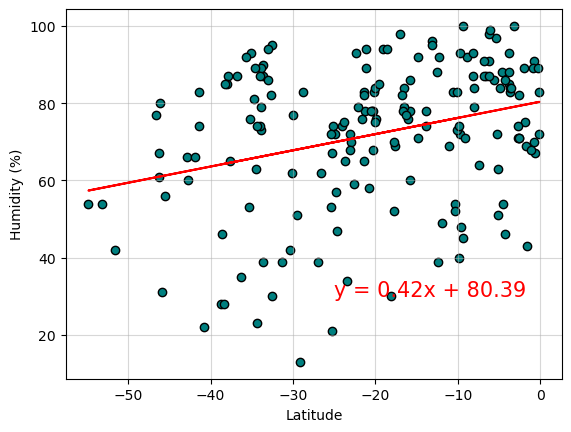

In [22]:
# Southern Hemisphere
lin_data = lin(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
print(f"The r-value is: {lin_data[2]}")
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], edgecolors = "black", color = "teal")
plt.plot(southern_hemi_df["Lat"],lin_data[0], "r-")
plt.annotate(lin_data[1], (-25,30), fontsize = 15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(alpha=.5)
plt.show()

**Discussion about the linear relationship:** 
In the northern hemisphere, as Latitude (x) increases, Humidity (y) increases, showing us a positive linear relationship. We obtain an r-value of 0.53, indicating a moderate-strong relationship.
In the Southern Hemisphere, as Latitude (x) increases, Humidity (y) increases, showing up a positive linear relationship. We obtain an r-value of .03, indicating a weak relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.23536337836886664


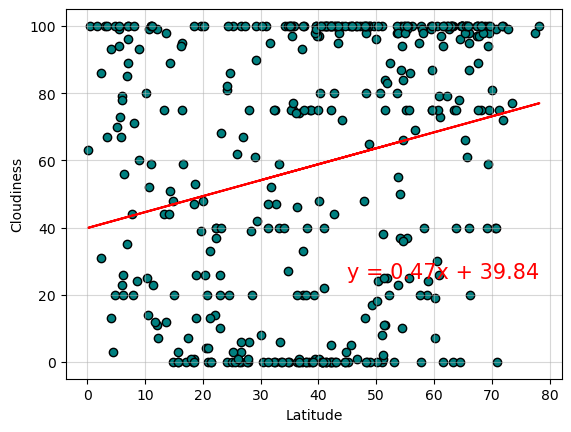

In [23]:
# Northern Hemisphere
lin_data = lin(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
print(f"The r-value is: {lin_data[2]}")
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], edgecolors = "black", color = "teal")
plt.plot(northern_hemi_df["Lat"],lin_data[0], "r-")
plt.annotate(lin_data[1], (45,25), fontsize = 15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(alpha=.5)
plt.show()

The r-value is: 0.3966774790796068


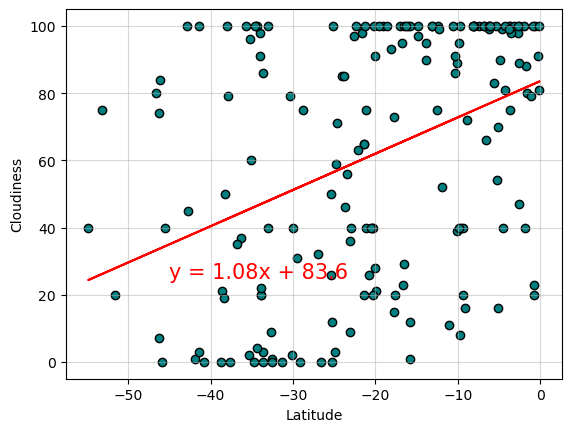

In [24]:
#Southern Hemisphere
lin_data = lin(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
print(f"The r-value is: {lin_data[2]}")
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], edgecolors = "black", color = "teal")
plt.plot(southern_hemi_df["Lat"],lin_data[0], "r-")
plt.annotate(lin_data[1], (-45,25), fontsize = 15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(alpha=.5)
plt.show()

**Discussion about the linear relationship:**
In the northern hemisphere, as Latitude (x) increases, Cloudiness (y) decreases, showing us a positive linear relationship. We obtain an r-value of .023, indicating a weak relationship.
In the Southern Hemisphere, as Latitude (x) increases, Cloudiness (y) increases, showing up a positive linear relationship. We obtain an r-value of .04, indicating a weak-moderate relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.032372772930591105


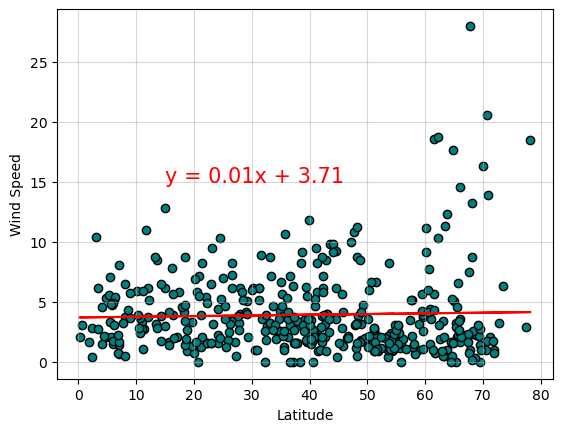

In [25]:
# Northern Hemisphere
lin_data = lin(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
print(f"The r-value is: {lin_data[2]}")
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], edgecolors = "black", color = "teal")
plt.plot(northern_hemi_df["Lat"],lin_data[0], "r-")
plt.annotate(lin_data[1], (15,15), fontsize = 15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(alpha=.5)
plt.show()

The p-value is 0.00404877981522007 < 0.05 --> Data is correlated
The r-value is: -0.2150385628253526


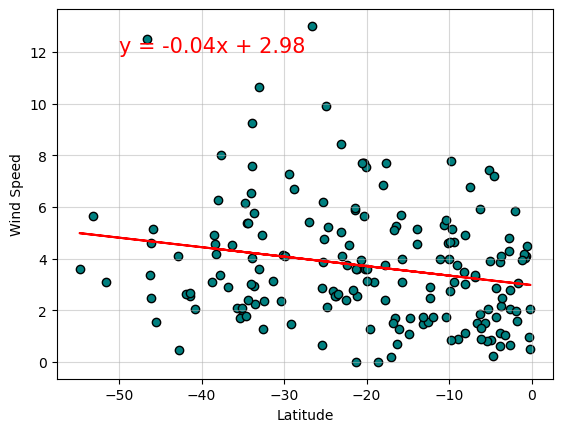

In [26]:
# Southern Hemisphere
lin_data = lin(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
if lin_data[3] < 0.05:
    print(f"The p-value is {lin_data[3]} < 0.05 --> Data is correlated")
else:
    print(f"The p-value is {lin_data[3]} > 0.05 --> Data is not correlated")
print(f"The r-value is: {lin_data[2]}")
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], edgecolors = "black", color = "teal")
plt.plot(southern_hemi_df["Lat"],lin_data[0], "r-")
plt.annotate(lin_data[1], (-50,12), fontsize = 15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(alpha=.5)
plt.show()

**Discussion about the linear relationship:** 
In the northern hemisphere, as Latitude (x) increases, Wind Speed (y) increases slightly, showing us a positive linear relationship. We obtain an r-value of .03, indicating a weak relationship.
In the Southern Hemisphere, as Latitude (x) increases, Wind Speed (y) decreases, showing up a negative linear relationship. We obtain an r-value of -.021, indicating a weak relationship.